# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [3]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning the data 

## Dropping unwanted features

In [6]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']

In [7]:
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [8]:
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


## Feature Scaling

In [9]:
columnsToScale = ['temp','hum','windspeed']

In [10]:
scaler = StandardScaler() 

In [11]:
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])

In [12]:
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [13]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))//24

In [14]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(bikesData,test_size=0.3)

In [15]:
train_set.sort_values('dayCount',axis=0,inplace=True)
test_set.sort_values('dayCount',axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
train_set.shape

(12165, 13)

In [17]:
train_set.shape

(12165, 13)

In [18]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ", scores.std())

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

In [20]:
trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set.cnt

# Train and Analyze the Models

 ## Train DecisionTree Model

In [21]:
dec_reg = DecisionTreeRegressor(random_state=42)
dt_mae_scores = -cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')
display_scores(dt_mae_scores)

Scores:  [34.79129006 38.57436319 34.89153657 41.44782251 44.03533279 58.99342105
 56.38815789 48.59786184 46.1875     96.68256579]
Mean:  50.05898516898759
Standard deviation:  17.367357842000466


In [22]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))
display_scores(dt_mse_scores)

Scores:  [ 57.85243887  60.04271966  53.64159493  67.95643633  69.34300796
  91.15349078  90.72611872  79.20852829  79.52359175 151.62740539]
Mean:  80.10753326893976
Standard deviation:  26.856777294152472


## Train Linear Regression Model

In [23]:
lin_reg = LinearRegression()

lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')

display_scores(lr_mae_scores)

Scores:  [ 65.12861551  77.64947806 111.60104228  92.26532259  76.21170848
  95.84265448 132.85620045 156.12502903 154.02338617 124.34847252]
Mean:  108.60519095551554
Standard deviation:  30.81162943384766


In [24]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))
display_scores(lr_mse_scores)

Scores:  [ 82.33675912 106.47295404 129.76208623 119.0635804  106.37737226
 128.22120955 177.15446946 186.15659886 198.08021868 159.45806807]
Mean:  139.3083316671396
Standard deviation:  36.76888914221132


##  Train Random Forest Model

In [25]:
forest_reg = RandomForestRegressor(random_state=42,n_estimators=150)

rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')

display_scores(rf_mae_scores)

Scores:  [32.548447   28.40494111 28.09798959 32.51066009 35.14226787 52.13068531
 36.91962719 39.37330044 36.67845395 82.33189145]
Mean:  40.41382640030129
Standard deviation:  15.393702647264004


In [26]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))

display_scores(rf_mse_scores)

Scores:  [ 44.7435648   43.85517745  42.35585763  53.17241604  59.28109393
  83.7972394   58.61536177  64.22632583  59.8126293  129.58918829]
Mean:  63.94488544382358
Standard deviation:  24.748776290235263


## Train XGBoost Model

In [27]:
xgb_reg = XGBRegressor(random_state=42,n_estimators=150)

xg_mae_scores = -cross_val_score(xgb_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')

display_scores(xg_mae_scores)

Scores:  [37.79309019 34.63252857 31.70912052 36.56079825 35.64475089 36.09165349
 57.97631707 59.9469124  65.87949929 82.94164447]
Mean:  47.91763151339088
Standard deviation:  16.602295244016844


In [28]:
xg_mse_scores = np.sqrt(-cross_val_score(xgb_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_squared_error'))

display_scores(xg_mse_scores)

Scores:  [ 51.7240338   47.75984912  43.62074593  54.19018602  53.35715744
  53.99302582  79.80486306  81.05640572  92.46827783 115.2711158 ]
Mean:  67.32456605341127
Standard deviation:  22.38024879025766


# Fine-Tuning the Selected Model

## Choosing set of hyperparameter combinations for Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[40,100,120,150],
               'max_features':[8,10,12],
               'max_depth':[15,28]}]

## Defining GridSearchCV

In [30]:
grid_search = GridSearchCV(forest_reg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

## Run Grid Search

In [31]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [15, 28], 'max_feature

In [32]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 10, 'n_estimators': 100}

In [42]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00332805, 0.00401299, 0.0049362 , 0.5920164 , 0.00215138,
       0.01978431, 0.06931806, 0.01536636, 0.09668126, 0.03407668,
       0.00822169, 0.15010662])

In [46]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [47]:
test_set.sort_values('dayCount',axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
test_x_cols = test_set.drop('cnt',axis=1).columns.values
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [83]:
test_y_cols = 'cnt'
test_y_cols

'cnt'

In [84]:
X_test = test_set.loc[:,test_x_cols]
X_test

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,dayCount
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,0
14,1,0,1,14,0,6,0,2,-0.192091,0.480868,0.764304,0
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,0
5,1,0,1,5,0,6,0,2,-1.334648,0.636370,-0.821484,0
6,1,0,1,6,0,6,0,1,-1.438516,0.895539,-1.553889,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17369,1,1,12,14,0,1,1,2,-1.126910,-0.918645,0.276306,723
17352,1,1,12,21,0,0,0,1,-1.542385,-0.607642,-0.211691,723
17361,1,1,12,6,0,1,1,1,-1.750123,0.066198,-0.211691,723
17378,1,1,12,23,0,1,1,1,-1.230779,0.118032,-0.456099,724


In [85]:
y_test =test_set.loc[:,test_y_cols]
y_test

2         32
14       106
1         40
5          1
6          2
        ... 
17369    247
17352     47
17361     40
17378     49
17377     61
Name: cnt, Length: 5214, dtype: int64

In [86]:
print(X_test.shape,y_test.shape)

(5214, 12) (5214,)


# Make Predictions on the Test dataset using Final Model

In [104]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [111]:
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [112]:
fin_mod = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [115]:
fin_mod.fit(trainingCols,trainingLabels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [116]:
test_set.loc[:,'predictedCounts'] = fin_mod.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [105]:
test_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,32,0,15.583333
14,1,0,1,14,0,6,0,2,-0.192091,0.480868,0.764304,106,0,116.354915
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,40,0,21.411667
5,1,0,1,5,0,6,0,2,-1.334648,0.636370,-0.821484,1,0,4.218469
6,1,0,1,6,0,6,0,1,-1.438516,0.895539,-1.553889,2,0,5.270000


In [106]:
mse = mean_squared_error(y_test,test_set.loc[:,'predictedCounts_test'])
mse

1692.3611275778803

In [117]:
mse1 = mean_squared_error(y_test,test_set.loc[:,'predictedCounts'])
mse1

1693.9653126526234

In [118]:
fin_mse = np.sqrt(mse1)
fin_mse

41.157809862195336

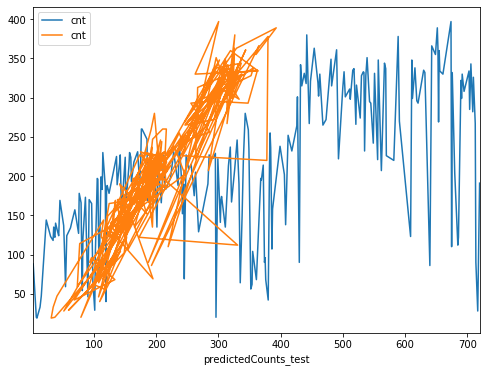

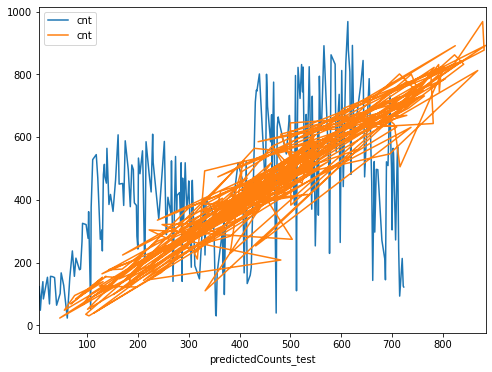

In [110]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    test_set_freq_time = test_set[test_set.hr == time]
    test_set_freq_time.plot(kind='line',x='dayCount',y='cnt',ax = ax)
    test_set_freq_time.plot(kind='line',x='predictedCounts_test',y='cnt',ax = ax)
    plt.show()

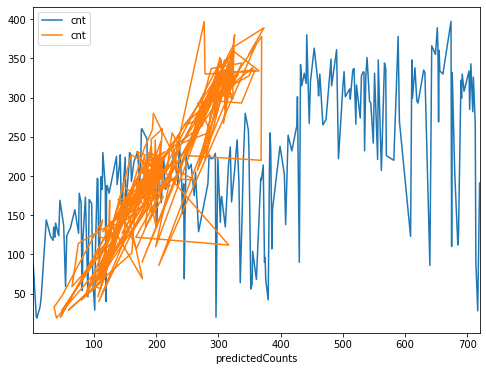

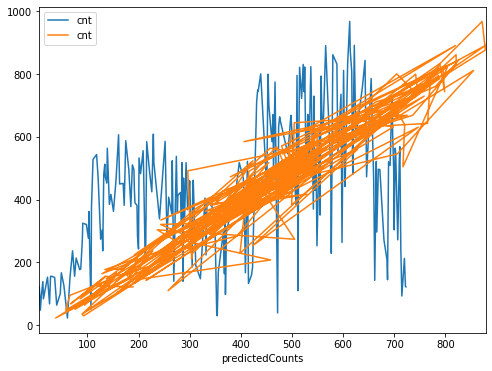

In [119]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    test_set_freq_time = test_set[test_set.hr == time]
    test_set_freq_time.plot(kind='line',x='dayCount',y='cnt',ax = ax)
    test_set_freq_time.plot(kind='line',x='predictedCounts',y='cnt',ax = ax)
    plt.show()